## My Neural Network Implementation

**Currently supported**:
- *HE* weights initialization
- Multiple *Dense* Layers
- *Sigmoid* Activation Function
- *Mini-Batch Gradient Descent*
- MSE Error function

**Backlog**:
- Agnostic Error and Activation Functions
- *Gradient checking*
- Validation set evaluation during training
- History containing epochs-related changes on validation error and other attributes
- Input data validation
- Automatic differentiation/backpropagation for different Error and Activation Functions
- *Stochastic Batch Gradient Descent*
- Dropout
- Early Stopping
- Different Initialization methods (*Xavier, Standard*)
- *RNN* and *LSTM* Layers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

from neuralnet import NeuralNet

### Get Data

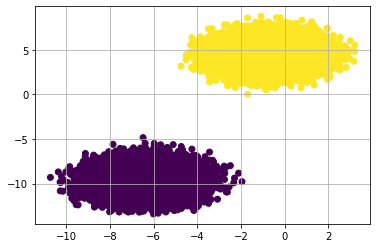

In [2]:
X, y = make_blobs(100000, centers=2, n_features=2, random_state=11)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid(True)
plt.show()

### Define Dense Hidden Layers Architecture

In [3]:
dense_layers = [
    (2, 100),
    (100, 100),
    (100, 1)
]
nn = NeuralNet(layer_shapes=dense_layers)

### Split Train and Test set and optimize the neural network weights

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.33, random_state=10)

In [5]:
nn.train(Xtrain, Ytrain, 3, 64)

100%|██████████| 1047/1047 [00:00<00:00, 1541.03it/s]


### Evaluate Precision on Test Set

In [7]:
forwards = nn.compute_forward_propagation(Xtest)
ypred = np.around(forwards[-1])
precision = (ypred == Ytest.reshape(-1,1)).mean()
print(f"Precission: {round(precision, 2) * 100}%")

### Evaluate Precision on Train Set

In [10]:
train_forwards = nn.compute_forward_propagation(Xtrain)
ytrain_pred = np.around(train_forwards[-1])
precision = (ytrain_pred == Ytrain.reshape(-1,1)).mean()
print(f"Precission: {round(precision, 2) * 100}%")

Precission: 100.0%
